# Import libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import graphviz

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


# Load data from pickle

In [3]:
import helper

train_images, train_labels, class_names = helper.load_pickle('dataset/grayscale/training')
test_images, test_labels, test_names = helper.load_pickle('dataset/grayscale/test')

# Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 46371 images in the training set, 
with each image represented as 100 x 100 pixels:

In [4]:
train_images.shape

(46371, 100, 100)

In [5]:
np.min(train_images[0]), np.max(train_images[0])

(0.018638823529411763, 1.0)

Likewise, there are 46371 labels in the training set:

In [6]:
len(train_labels)

46371

In [7]:
train_labels

array([ 0,  0,  0, ..., 89, 89, 89])

In [8]:
test_images.shape

(15563, 100, 100)

In [9]:
len(test_labels)

15563

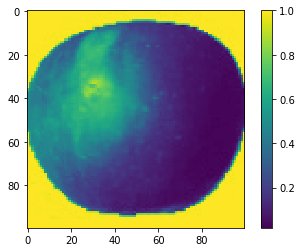

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

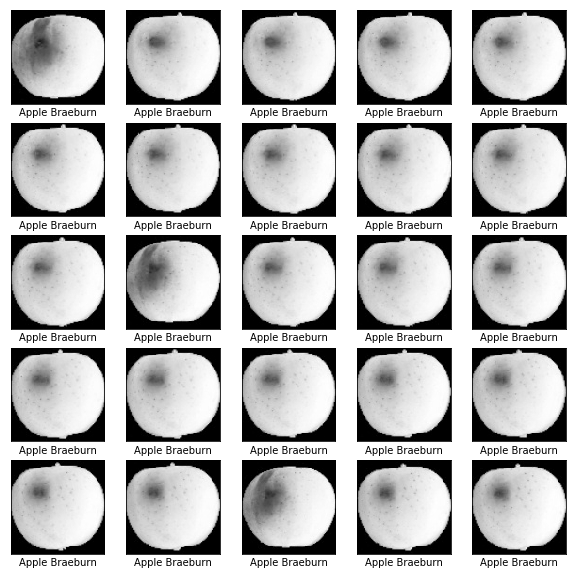

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [12]:
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='./logs', 
        histogram_freq=0, 
        batch_size=32, 
        write_graph=True, 
        write_grads=False, 
        write_images=False, 
        embeddings_freq=0, 
        embeddings_layer_names=None, 
        embeddings_metadata=None, 
        embeddings_data=None
    )
]

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(90, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2560256   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 90)                11610     
Total params: 2,604,762
Trainable params: 2,604,762
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(train_images, train_labels, epochs=10,
                batch_size=100,
                validation_split=0.2,
                shuffle=True,
                callbacks=callbacks)

Train on 37096 samples, validate on 9275 samples
Epoch 1/10
37096/37096 [==============================] - 19s 508us/step - loss: 3.3838 - acc: 0.2330 - val_loss: 8.7091 - val_acc: 0.0000e+00
Epoch 2/10
37096/37096 [==============================] - 18s 481us/step - loss: 1.8098 - acc: 0.6293 - val_loss: 9.7941 - val_acc: 0.0000e+00
Epoch 3/10
37096/37096 [==============================] - 18s 479us/step - loss: 1.0046 - acc: 0.7940 - val_loss: 10.5508 - val_acc: 0.0033
Epoch 4/10
37096/37096 [==============================] - 18s 476us/step - loss: 0.6173 - acc: 0.8762 - val_loss: 11.2937 - val_acc: 0.0024
Epoch 5/10
37096/37096 [==============================] - 19s 521us/step - loss: 0.3939 - acc: 0.9311 - val_loss: 11.4781 - val_acc: 0.0045
Epoch 6/10
37096/37096 [==============================] - 19s 517us/step - loss: 0.2712 - acc: 0.9565 - val_loss: 12.0092 - val_acc: 0.0036
Epoch 7/10
37096/37096 [==============================] - 20s 529us/step - loss: 0.2075 - acc: 0.9666 - v

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

15563/15563 [==============================] - 2s 147us/step
Test accuracy: 0.6518666066953672


In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [25]:
predictions = model.predict(test_images)

In [75]:
predictions[0]

array([9.5676690e-01, 1.4066062e-07, 8.0330345e-08, 2.0438809e-05,
       3.5165696e-04, 9.4640005e-04, 3.4740169e-02, 2.2009027e-03,
       2.9215947e-08, 3.9887243e-05, 2.1317954e-09, 8.1487386e-05,
       4.2084875e-04, 8.8732364e-09, 6.3666391e-08, 2.3476200e-07,
       6.3143951e-08, 4.2199332e-05, 1.1978628e-09, 7.3454381e-11,
       4.4693810e-10, 7.5547405e-06, 1.0212584e-08, 1.9128883e-08,
       2.4215167e-06, 2.9121995e-07, 3.5907575e-09, 3.6438912e-08,
       1.9651125e-07, 1.8690228e-07, 3.0651579e-05, 4.0302191e-05,
       1.5090112e-08, 2.1033549e-04, 9.3097231e-12, 7.9384353e-11,
       1.4426459e-09, 1.2790090e-08, 8.6197457e-07, 8.7261320e-08,
       2.0956048e-09, 1.3854136e-06, 4.1389811e-08, 4.6794224e-07,
       5.2353467e-08, 1.1690531e-08, 2.0547813e-10, 9.2529729e-07,
       2.9729513e-08, 1.2753757e-06, 5.3380783e-05, 1.9133483e-06,
       1.8943890e-08, 2.0762584e-06, 7.6357787e-10, 3.3019143e-03,
       4.5967265e-04, 4.9419859e-06, 3.4300890e-10, 1.4658192e

In [76]:
np.argmax(predictions[0])

0

In [77]:
test_labels[0]

0

In [78]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(90), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

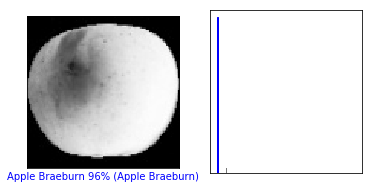

In [79]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

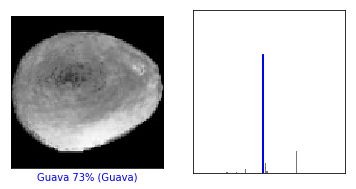

In [82]:
i = 7000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

[ 1586  3921  1314 12787   953  8664  5725 14787  4479  4678 14026   890
  7102  3707  2659]


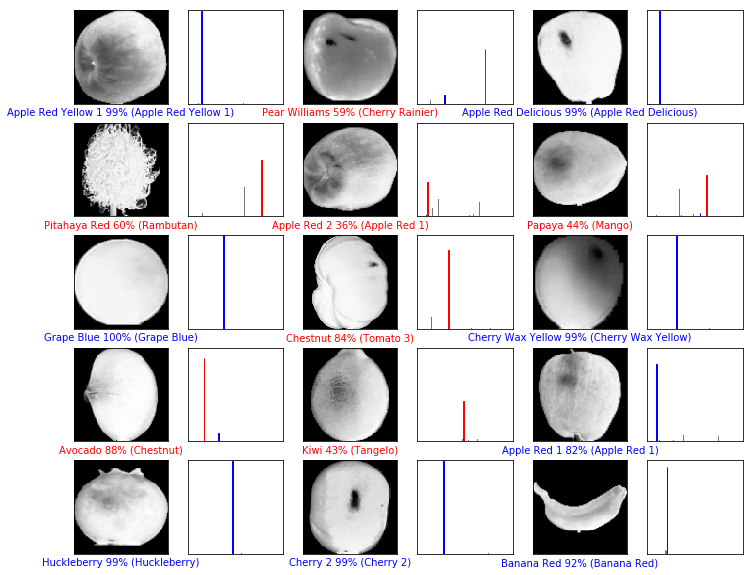

In [83]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
sample = np.random.randint(low = 0, high = len(test_images), size = num_images)
print(sample)

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(sample[i], predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(sample[i], predictions, test_labels)

In [84]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(100, 100)


In [85]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 100, 100)


In [86]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.5676690e-01 1.4066062e-07 8.0330345e-08 2.0438789e-05 3.5165696e-04
  9.4639871e-04 3.4740139e-02 2.2009036e-03 2.9215892e-08 3.9887134e-05
  2.1317914e-09 8.1487233e-05 4.2084852e-04 8.8732186e-09 6.3666143e-08
  2.3476179e-07 6.3143709e-08 4.2199332e-05 1.1978606e-09 7.3454659e-11
  4.4693810e-10 7.5547259e-06 1.0212545e-08 1.9128846e-08 2.4215076e-06
  2.9121912e-07 3.5907575e-09 3.6438841e-08 1.9651087e-07 1.8690191e-07
  3.0651521e-05 4.0302191e-05 1.5090112e-08 2.1033509e-04 9.3097231e-12
  7.9384353e-11 1.4426431e-09 1.2790065e-08 8.6197207e-07 8.7261320e-08
  2.0956048e-09 1.3854110e-06 4.1389651e-08 4.6794131e-07 5.2353567e-08
  1.1690531e-08 2.0547813e-10 9.2529729e-07 2.9729401e-08 1.2753744e-06
  5.3380681e-05 1.9133445e-06 1.8943890e-08 2.0762564e-06 7.6357787e-10
  3.3019066e-03 4.5967218e-04 4.9419764e-06 3.4300759e-10 1.4658208e-04
  3.0291540e-12 1.2300045e-07 1.0119739e-05 1.5352074e-10 3.4282530e-09
  6.1989518e-08 1.2792731e-07 2.5509019e-11 1.2215864e-09 4.7979

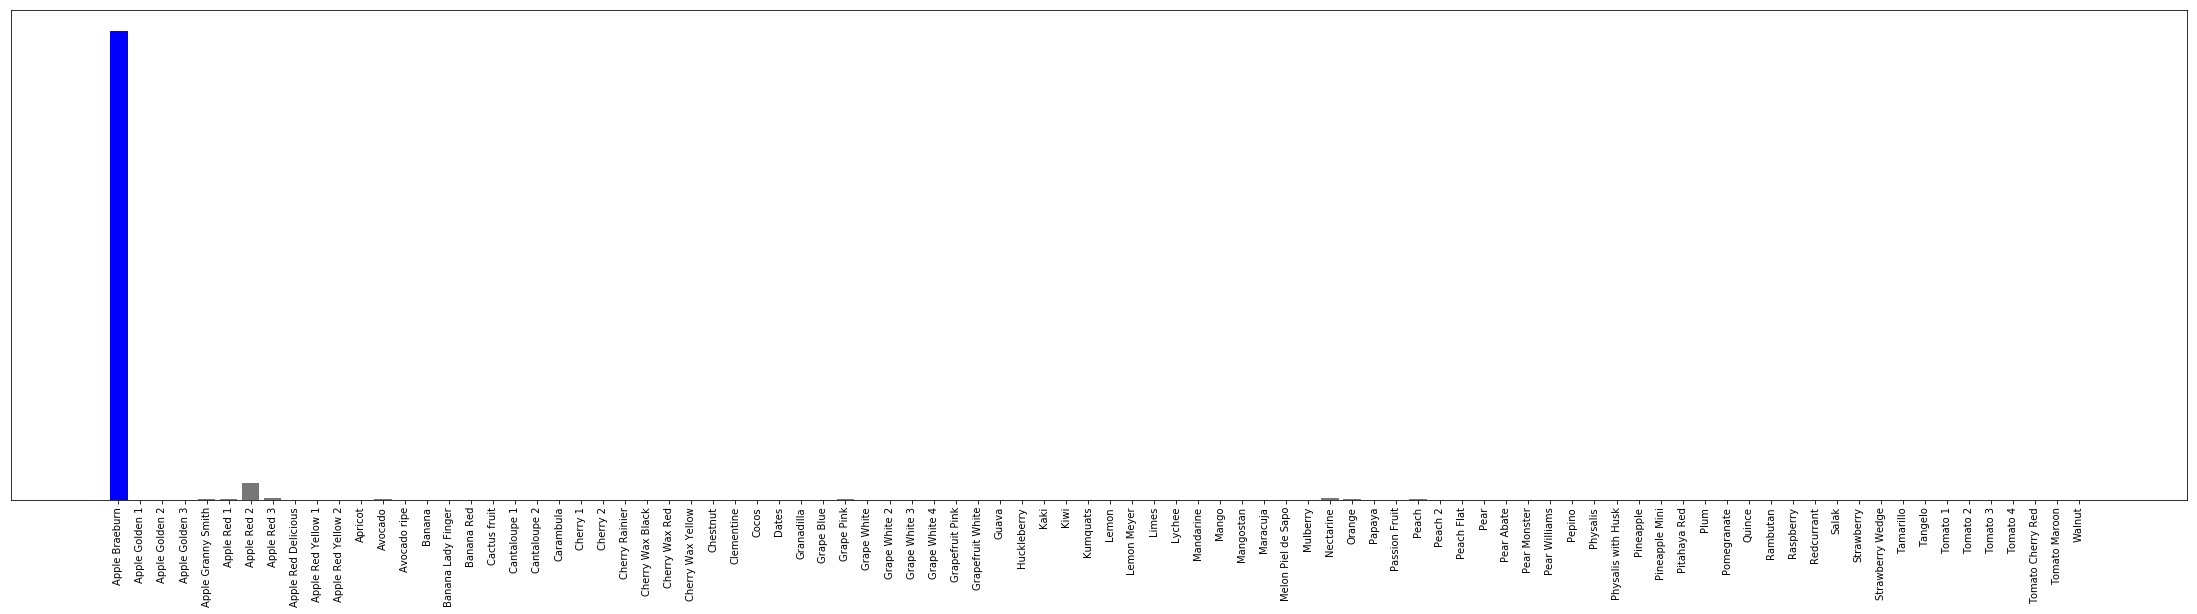

In [87]:
plt.rcParams["figure.figsize"] = (39, 9)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(90), class_names, rotation=90)

In [88]:
np.argmax(predictions_single[0])

0